# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_kddcup99
import pickle

plt.rcParams['figure.figsize'] = (15, 8)

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
dataset = fetch_kddcup99(as_frame=True)
dataset

{'data':        duration protocol_type  service   flag src_bytes dst_bytes land  \
 0             0        b'tcp'  b'http'  b'SF'       181      5450    0   
 1             0        b'tcp'  b'http'  b'SF'       239       486    0   
 2             0        b'tcp'  b'http'  b'SF'       235      1337    0   
 3             0        b'tcp'  b'http'  b'SF'       219      1337    0   
 4             0        b'tcp'  b'http'  b'SF'       217      2032    0   
 ...         ...           ...      ...    ...       ...       ...  ...   
 494016        0        b'tcp'  b'http'  b'SF'       310      1881    0   
 494017        0        b'tcp'  b'http'  b'SF'       282      2286    0   
 494018        0        b'tcp'  b'http'  b'SF'       203      1200    0   
 494019        0        b'tcp'  b'http'  b'SF'       291      1200    0   
 494020        0        b'tcp'  b'http'  b'SF'       219      1234    0   
 
        wrong_fragment urgent hot  ... dst_host_count dst_host_srv_count  \
 0            

In [3]:
data, target = dataset.data, dataset.target

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Summarize data

In [4]:
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
5,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
6,0,b'tcp',b'http',b'SF',212,1940,0,0,0,0,...,1,69,1.0,0.0,1.0,0.04,0.0,0.0,0.0,0.0
7,0,b'tcp',b'http',b'SF',159,4087,0,0,0,0,...,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0
8,0,b'tcp',b'http',b'SF',210,151,0,0,0,0,...,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0
9,0,b'tcp',b'http',b'SF',212,786,0,0,0,1,...,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0


In [5]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(data.shape,data.shape[0],data.shape[1]))

Shape of the given dataset is (494021, 41).Contains 494021 rows and 41 columns 


### Feature Names and its Datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

Mengubah Tipe data ke float32

In [7]:
for col in data.columns:
    if col not in ["protocol_type", "service", "flag"]:
        data[col] = data[col].astype(np.float32, errors="ignore")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  float32
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  float32
 5   dst_bytes                    494021 non-null  float32
 6   land                         494021 non-null  float32
 7   wrong_fragment               494021 non-null  float32
 8   urgent                       494021 non-null  float32
 9   hot                          494021 non-null  float32
 10  num_failed_logins            494021 non-null  float32
 11  logged_in                    494021 non-null  float32
 12  num_compromised              494021 non-null  float32
 13 

Decode type data object

In [9]:
data["protocol_type"] = data["protocol_type"].str.decode("utf-8")
data["service"] = data["service"].str.decode("utf-8")
data["flag"] = data["flag"].str.decode("utf-8")

### Data Spliting

Memilih dan simpan fitur Numerik dan Kategorikal secara terpisah dalam variabel yang berbeda.

In [10]:
##Selecting numerical features
numerical_data = data.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features)

There are 38 numerical features:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [11]:
#Selecting categoricalfeatures
categorical_data=data.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:')
print(categorical_features)

There are 3 numerical features:
['protocol_type', 'service', 'flag']


### Descriptive Analysis
Dalam Analisis Deskriptif kita menganalisis setiap variabel secara terpisah untuk mendapatkan kesimpulan tentang fitur.

#### Summary satistics of Numerical Features

In [12]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979305,707.746460,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610352,988218.062500,0.0,45.00,520.0,1032.00,693375616.0
dst_bytes,494021.0,868.532471,33040.000000,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


Tabel di atas menunjukkan statistik dasar seperti **rata-rata**, **kuantil**, **standar deviasi** tentang setiap fitur numerik

##### Variance of each numerical features

In [13]:
numerical_data.var()

duration                       5.009051e+05
src_bytes                      9.765749e+11
dst_bytes                      1.091642e+09
land                           4.453063e-05
wrong_fragment                 1.817245e-02
urgent                         3.036294e-05
hot                            6.116844e-01
num_failed_logins              2.408579e-04
logged_in                      1.262699e-01
num_compromised                3.233977e+00
root_shell                     1.113191e-04
su_attempted                   6.072496e-05
num_root                       4.051035e+00
num_file_creations             9.296021e-03
num_shells                     1.214406e-04
num_access_files               1.330914e-03
num_outbound_cmds              0.000000e+00
is_host_login                  0.000000e+00
is_guest_login                 1.384661e-03
count                          4.543182e+04
srv_count                      6.067493e+04
serror_rate                    1.449454e-01
srv_serror_rate                1

##### Skew in numerical features

In [14]:
numerical_data.skew()

duration                        25.864857
src_bytes                      699.213135
dst_bytes                      136.759277
land                           149.842041
wrong_fragment                  21.718929
urgent                         447.647003
hot                             32.629147
num_failed_logins              160.802612
logged_in                        1.979794
num_compromised                417.530243
root_shell                      94.758926
su_attempted                   230.979675
num_root                       417.065826
num_file_creations             192.334763
num_shells                     108.874214
num_access_files                61.201450
num_outbound_cmds                0.000000
is_host_login                    0.000000
is_guest_login                  26.799334
count                           -0.542006
srv_count                       -0.273848
serror_rate                      1.697598
srv_serror_rate                  1.697207
rerror_rate                      3

##### Observasi
Fitur **duration** dan **src_bytes** memiliki rentang kemiringan (skew) positif yang tinggi.

##### Histograms
Untuk menemukan distribusi dan outlier di setiap fitur

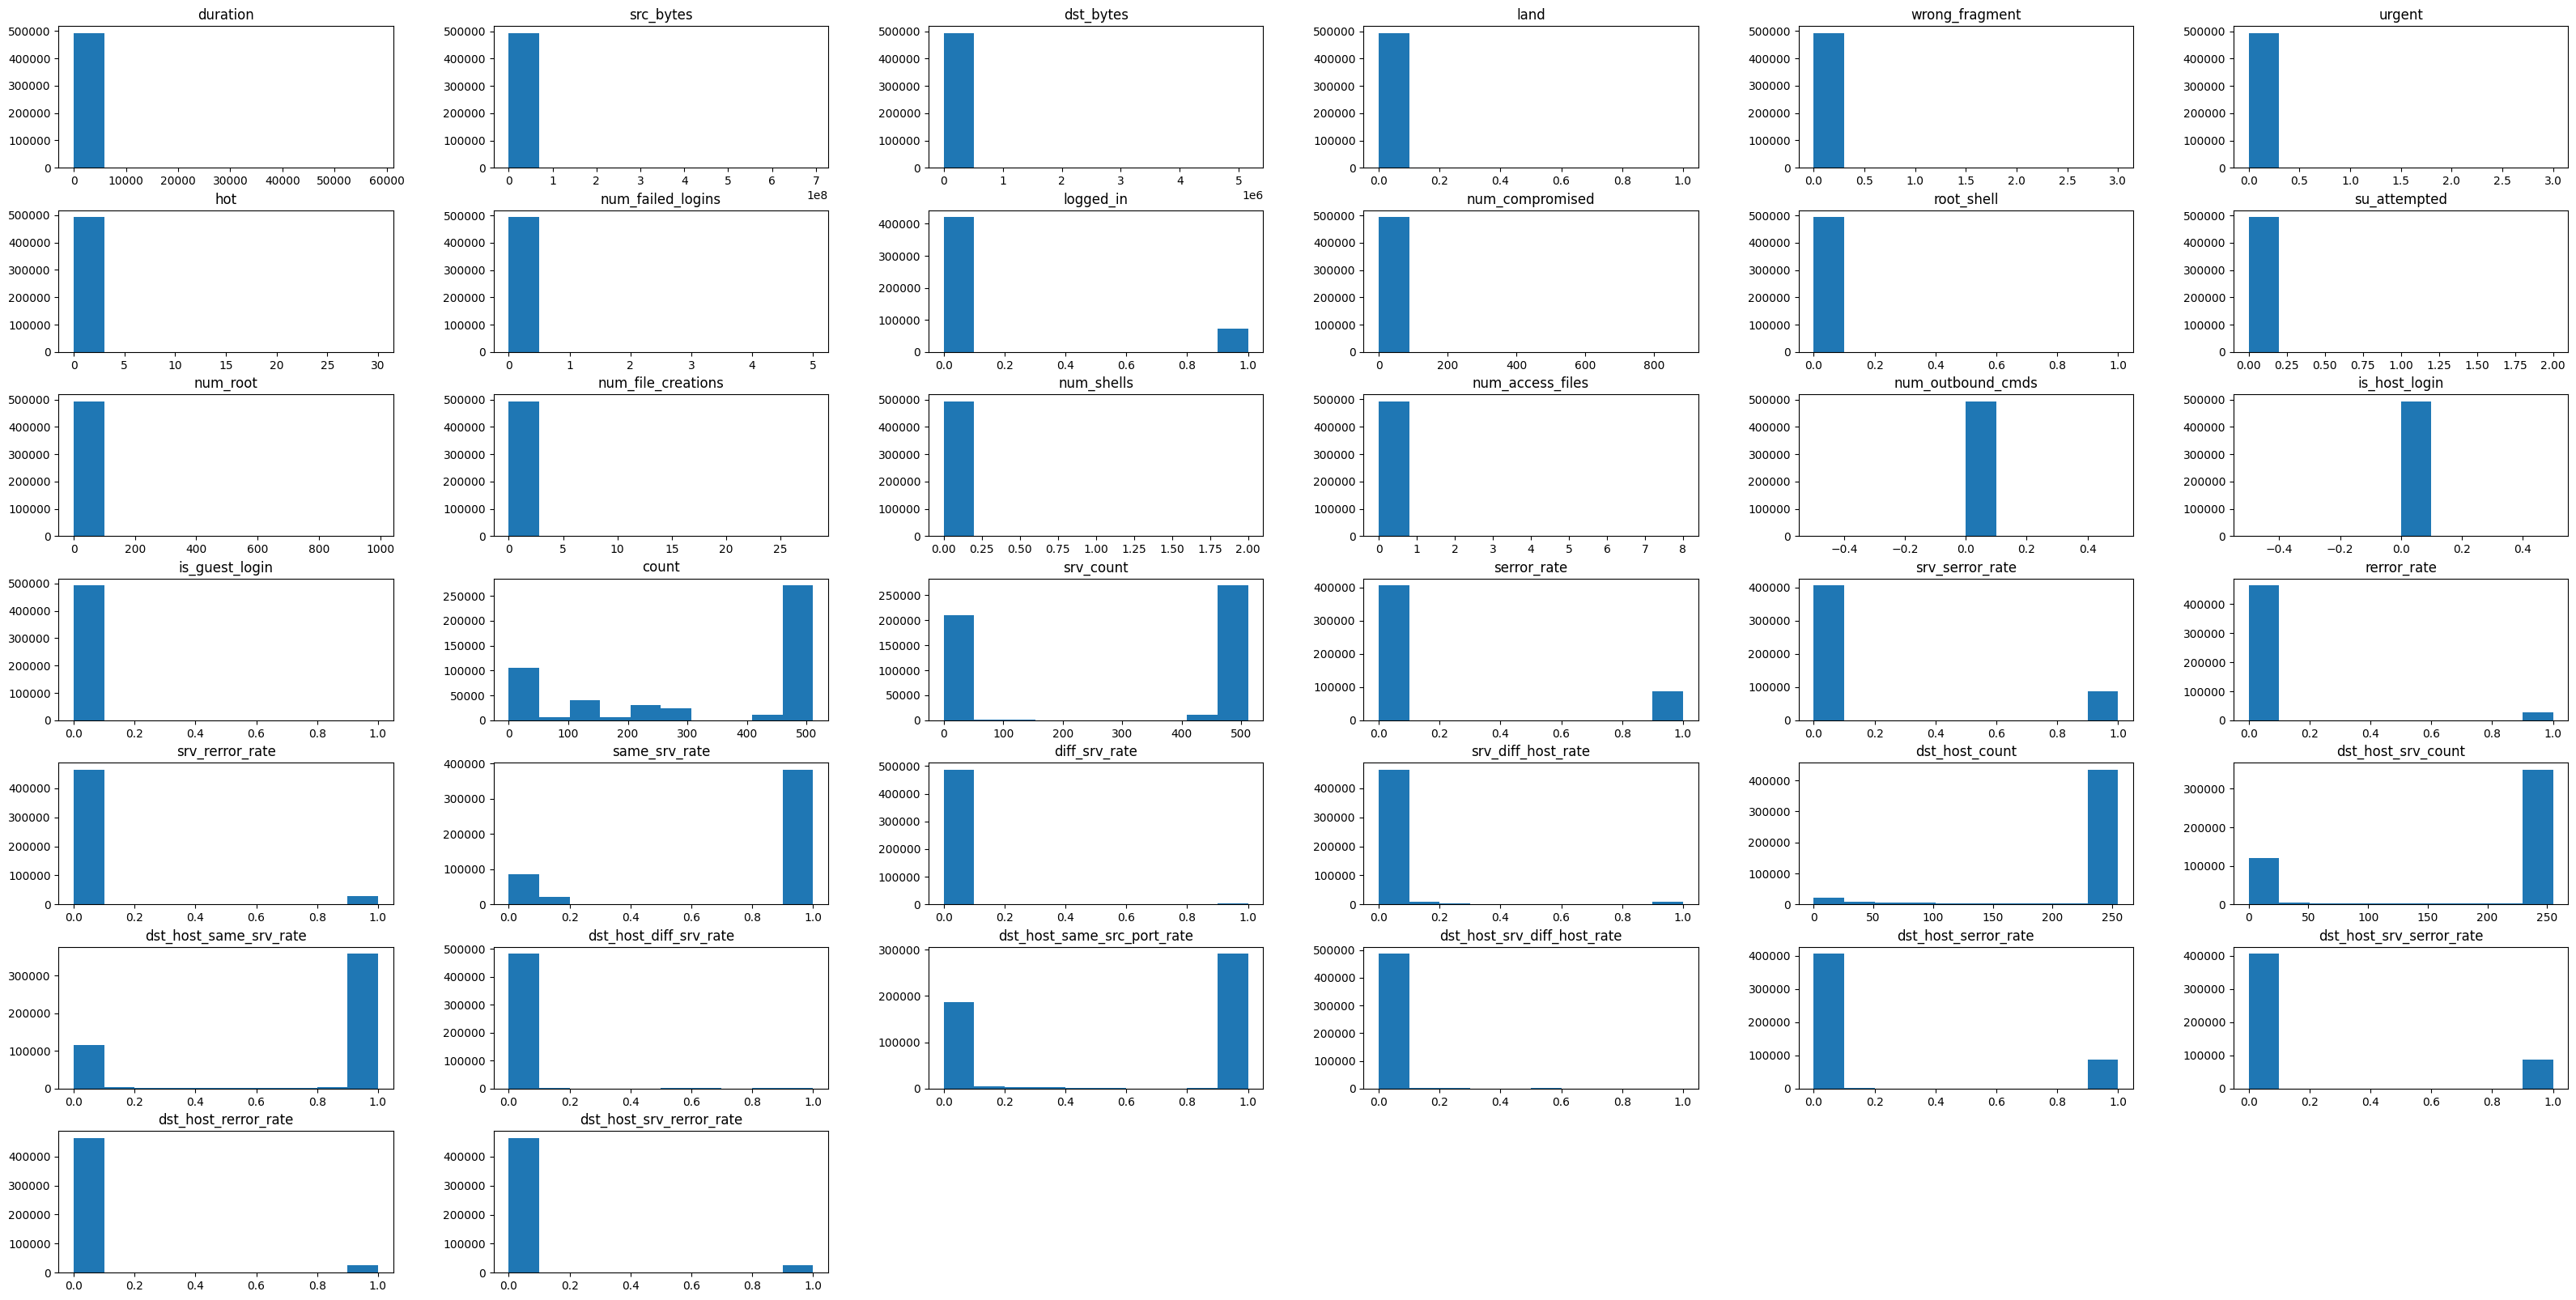

In [15]:
numerical_data.hist(bins=10, grid=False, figsize=(40, 20))
plt.show()

##### Number Unique values in each feature

In [16]:
numerical_data.nunique()

duration                        2495
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
srv_rerror_rate                   51
same_srv_rate                     99
diff_srv_rate                     78
s

##### Missing Value

In [17]:
numerical_data.isnull().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

##### Obeservations
1. Fitur **dst_bytes** menunjukkan sebagian besar berisi nilai unik, tetapi fitur lainnya menunjukkan lebih sedikit variasi.
2. Tidak ada fitur yang berisi nilai yang hilang sehingga tidak diperlukan penggunaan imputasi statistik apa pun.

#### Categorical Fitur

##### No of unique values in each categorical feature

In [18]:
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(len(categorical_features)),start=1):
    print(f"{index}. {categorical_features[i]} has {unique_counts[i]} unique values")

1. protocol_type has 3 unique values
2. service has 66 unique values
3. flag has 11 unique values


##### Barplot jumlah nilai unik dalam setiap fitur kategoris


protocol_type



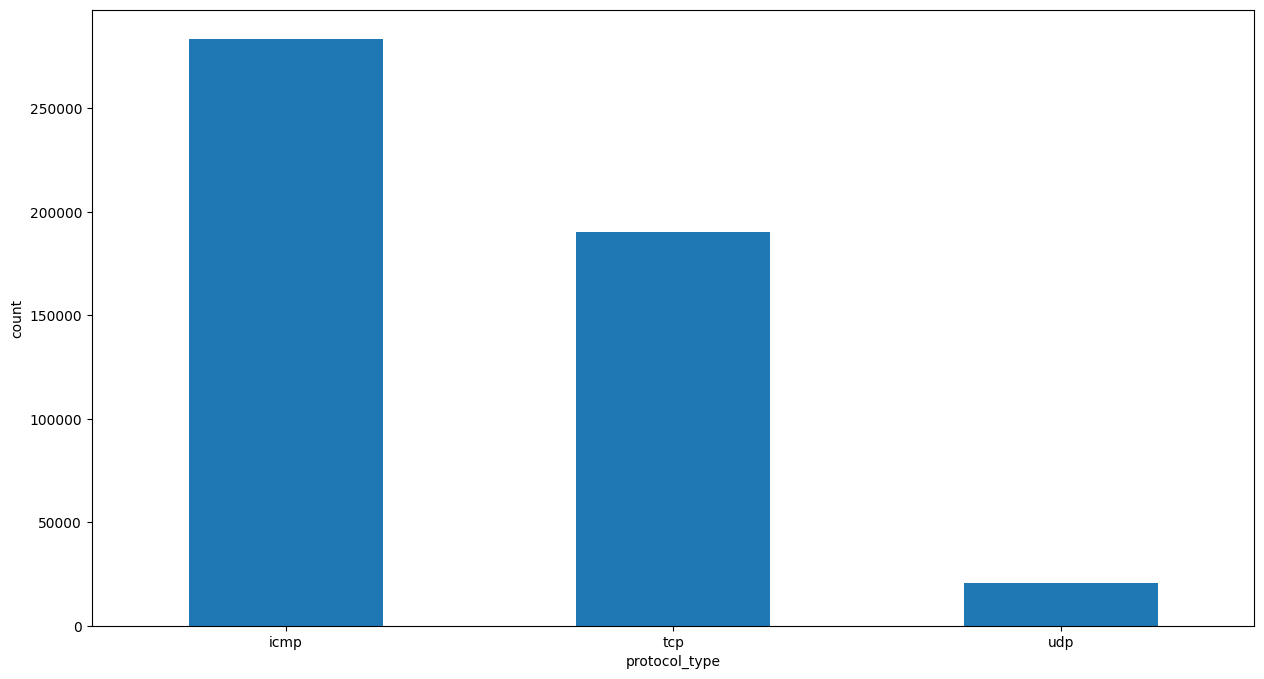


service



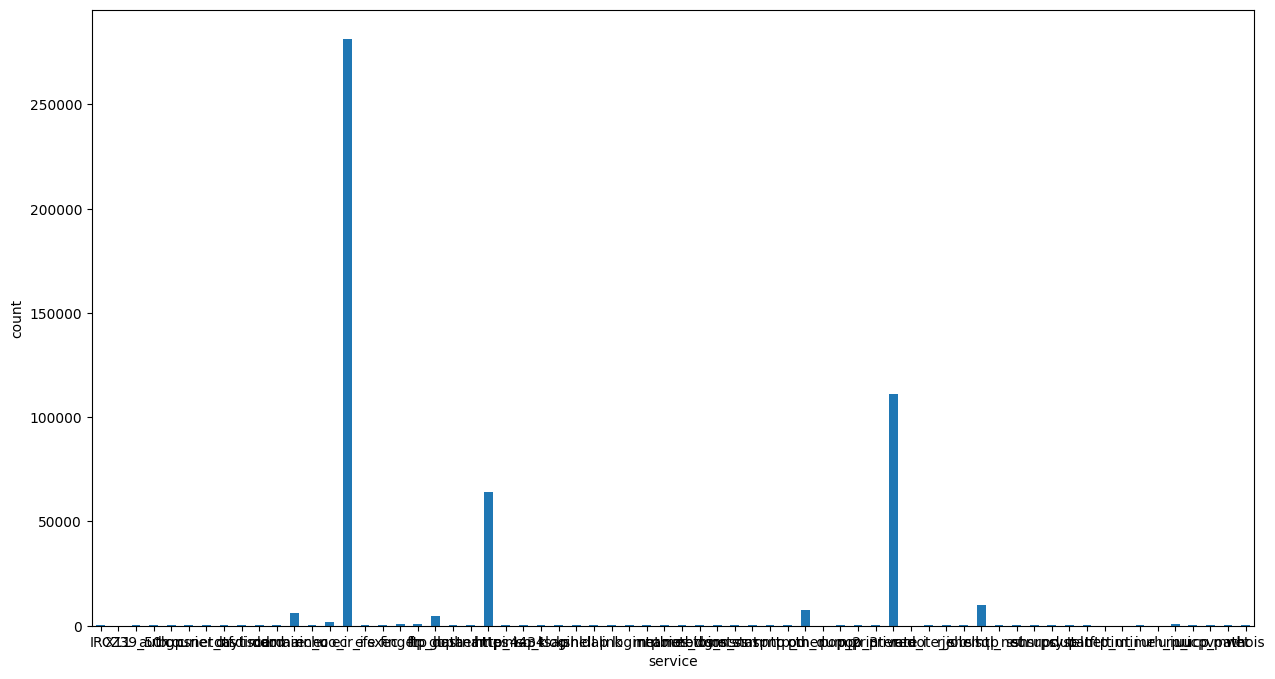


flag



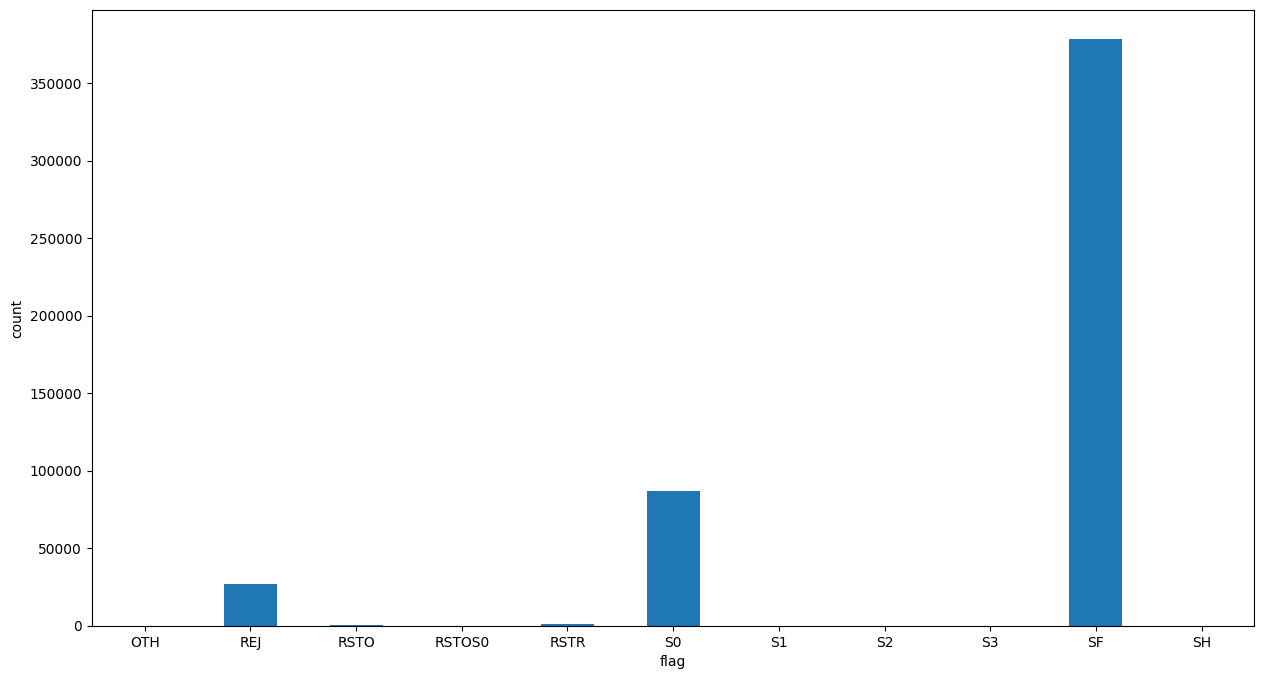

In [19]:
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n")
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

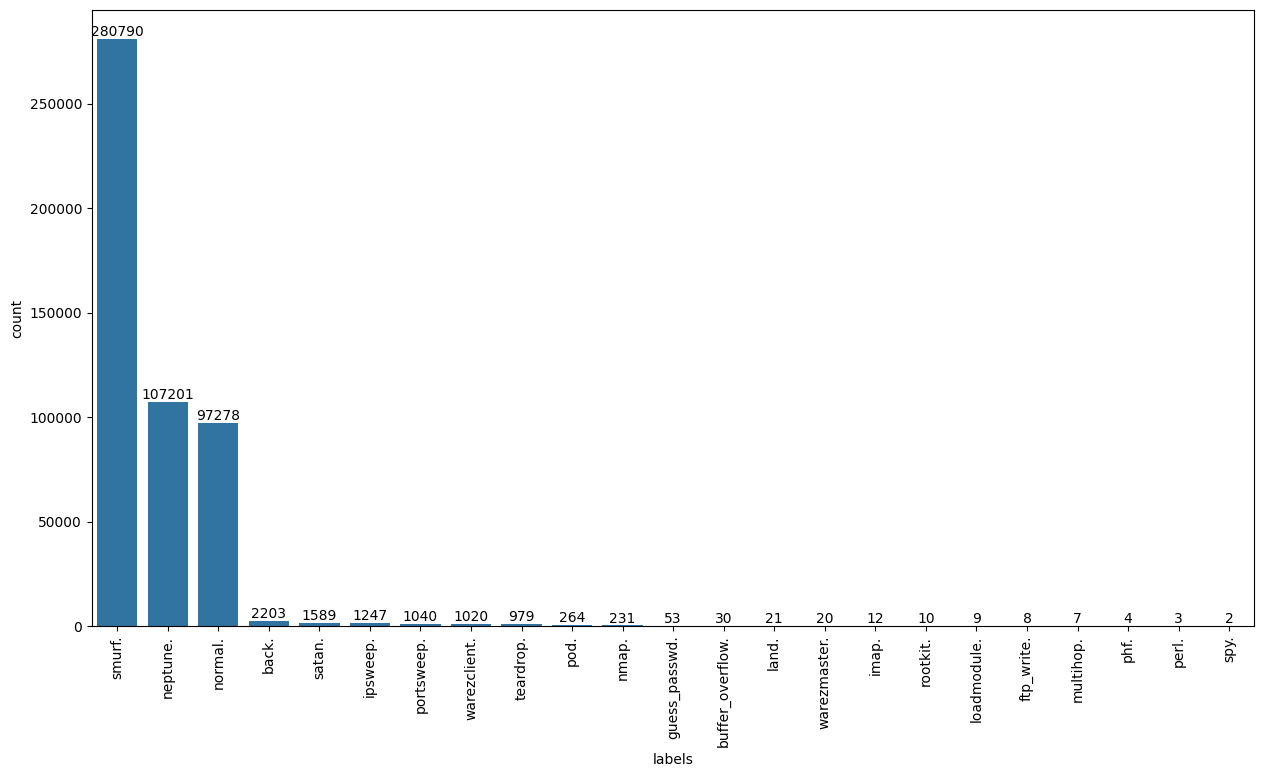

In [20]:
fig, ax = plt.subplots()
sns.barplot(target.value_counts(), ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

##### Observations


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [21]:
probe_attacks = [
    "buffer_overflow.",
    "loadmodule.",
    "perl.",
    "neptune.",
    "smurf.",
    "guess_passwd.",
    "pod.",
    "teardrop.",
    "portsweep.",
    "ipsweep.",
    "land.",
    "ftp_write.",
    "back.",
    "imap.",
    "satan.",
    "phf.",
    "nmap.",
    "multihop.",
    "warezmaster.",
    "warezclient.",
    "spy.",
    "rootkit.",
]
probe_attacks

['buffer_overflow.',
 'loadmodule.',
 'perl.',
 'neptune.',
 'smurf.',
 'guess_passwd.',
 'pod.',
 'teardrop.',
 'portsweep.',
 'ipsweep.',
 'land.',
 'ftp_write.',
 'back.',
 'imap.',
 'satan.',
 'phf.',
 'nmap.',
 'multihop.',
 'warezmaster.',
 'warezclient.',
 'spy.',
 'rootkit.']

In [22]:
target

0         b'normal.'
1         b'normal.'
2         b'normal.'
3         b'normal.'
4         b'normal.'
             ...    
494016    b'normal.'
494017    b'normal.'
494018    b'normal.'
494019    b'normal.'
494020    b'normal.'
Name: labels, Length: 494021, dtype: object

Decode target

In [23]:
target = target.str.decode("utf-8")
target

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: labels, Length: 494021, dtype: object

In [24]:
target = target.apply(lambda x: 1 if x in probe_attacks else 0)
target

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: labels, Length: 494021, dtype: int64

In [25]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

Categorical features: ['protocol_type', 'service', 'flag']


In [26]:
print(label_encoders)
data

{'protocol_type': LabelEncoder(), 'service': LabelEncoder(), 'flag': LabelEncoder()}


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,22,9,181.0,5450.0,0.0,0.0,0.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0.0,1,22,9,239.0,486.0,0.0,0.0,0.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0.0,1,22,9,235.0,1337.0,0.0,0.0,0.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0.0,1,22,9,219.0,1337.0,0.0,0.0,0.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0.0,1,22,9,217.0,2032.0,0.0,0.0,0.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,1,22,9,310.0,1881.0,0.0,0.0,0.0,0.0,...,86.0,255.0,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0.0,1,22,9,282.0,2286.0,0.0,0.0,0.0,0.0,...,6.0,255.0,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0.0,1,22,9,203.0,1200.0,0.0,0.0,0.0,0.0,...,16.0,255.0,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0.0,1,22,9,291.0,1200.0,0.0,0.0,0.0,0.0,...,26.0,255.0,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [27]:
numerical_features_to_scale = [col for col in data.columns if col not in categorical_features + ['binary_label']]

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_features_to_scale] = scaler.fit_transform(data[numerical_features_to_scale])

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,1,22,9,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.451536,-1.694314,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
1,-0.067792,1,22,9,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.297085,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
2,-0.067792,1,22,9,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.142633,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
3,-0.067792,1,22,9,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-2.988182,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
4,-0.067792,1,22,9,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-2.833731,-1.317099,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464


Save Label Encoder and Scaler for using in training Model

Save dataset

In [28]:
data.to_csv("./kddcup99_preprocessing/data.csv", index=False)
target.to_csv("./kddcup99_preprocessing/target.csv", index=False)